## Imports

In [1]:
import sys
sys.path.append('python/')
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
import scipy.optimize as opt
import dataPython as dp
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss

## Bulge

0.032457790309459424
5.070574690730433
41024432058.25408
4.2888694614208456e-06


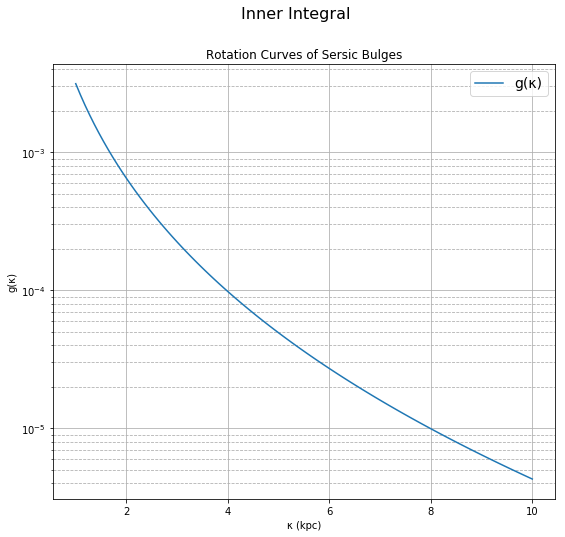

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00000000e-03 9.64723618e-02 1.91944724e-01 2.87417085e-01
 3.82889447e-01 4.78361809e-01 5.73834171e-01 6.69306533e-01
 7.64778894e-01 8.60251256e-01 9.55723618e-01 1.05119598e+00
 1.14666834e+00 1.24214070e+00 1.33761307e+00 1.43308543e+00
 1.52855779e+00 1.62403015e+00 1.71950251e+00 1.81497487e+00
 1.91044724e+00 2.00591960e+00 2.10139196e+00 2.19686432e+00
 2.29233668e+00 2.387809

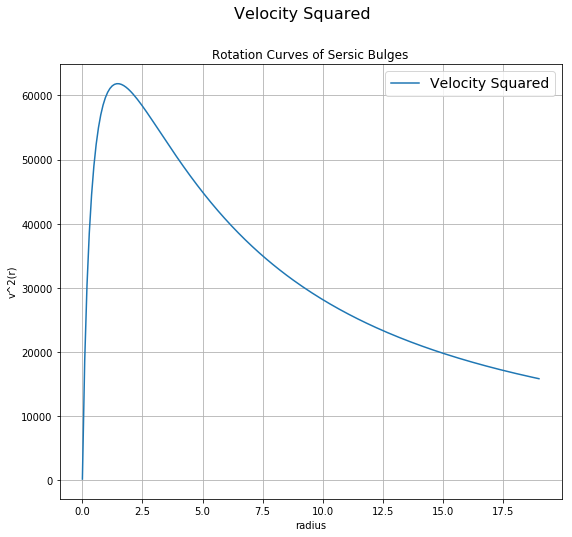

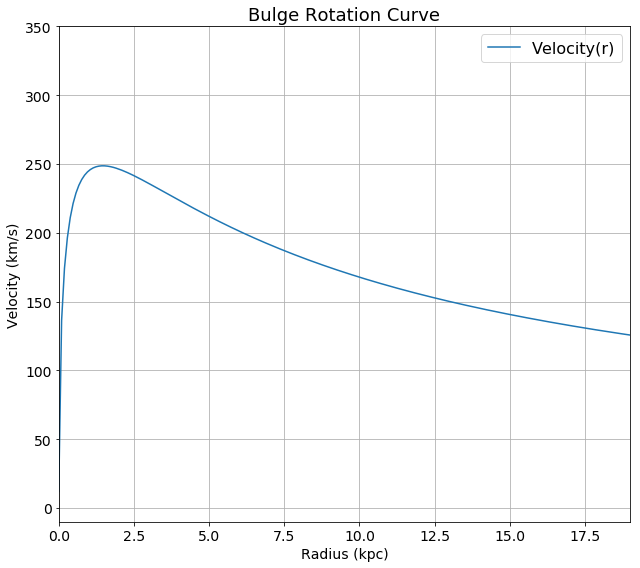

[1.00000000e-03 9.64723618e-02 1.91944724e-01 2.87417085e-01
 3.82889447e-01 4.78361809e-01 5.73834171e-01 6.69306533e-01
 7.64778894e-01 8.60251256e-01 9.55723618e-01 1.05119598e+00
 1.14666834e+00 1.24214070e+00 1.33761307e+00 1.43308543e+00
 1.52855779e+00 1.62403015e+00 1.71950251e+00 1.81497487e+00
 1.91044724e+00 2.00591960e+00 2.10139196e+00 2.19686432e+00
 2.29233668e+00 2.38780905e+00 2.48328141e+00 2.57875377e+00
 2.67422613e+00 2.76969849e+00 2.86517085e+00 2.96064322e+00
 3.05611558e+00 3.15158794e+00 3.24706030e+00 3.34253266e+00
 3.43800503e+00 3.53347739e+00 3.62894975e+00 3.72442211e+00
 3.81989447e+00 3.91536683e+00 4.01083920e+00 4.10631156e+00
 4.20178392e+00 4.29725628e+00 4.39272864e+00 4.48820101e+00
 4.58367337e+00 4.67914573e+00 4.77461809e+00 4.87009045e+00
 4.96556281e+00 5.06103518e+00 5.15650754e+00 5.25197990e+00
 5.34745226e+00 5.44292462e+00 5.53839698e+00 5.63386935e+00
 5.72934171e+00 5.82481407e+00 5.92028643e+00 6.01575879e+00
 6.11123116e+00 6.206703

In [29]:
#%run bulge.ipynb
%run ../NGC5533_Bulge/JB_Plot3_RotationCurve_n2_7.ipynb

In [30]:
##Noordermeer's Bulge curve
data_bulge_nord = dp.getXYdata('data/NGC5533-bulge_fmt.txt')

#convert to numpy arrays
r_b_nordold = np.asarray(data_bulge_nord['xx'])
v_b_nordold = np.asarray(data_bulge_nord['yy'])

print(len(r_b_nordold))

#getting data down to 200 points to be comparable to function

#rdata
i=0
r_b_nord = np.zeros((int(200)))
while i<len(r_b_nord):
    r_b_nord[i]=r_b_nordold[4*i]
    i +=1

#ydata
i=0
v_b_nord = np.zeros((int(200)))
while i<len(v_b_nord):
    v_b_nord[i]=v_b_nordold[4*i]
    i +=1

print(len(r_b_nord))    
print(len(x))

846
200
200


In [31]:
#function
def v(r,b):
    return b*vb

#(troubleshooting)seeing if values are decreasing
i = 0
while i < len(r_b_nord)-1:
    print(r_b_nord[i+1] - r_b_nord[i])
    i += 1

-0.0005000000000000004
0.04660000000000003
0.02310000000000001
0.046599999999999975
0.02300000000000002
0.046599999999999975
0.07030000000000003
0.07019999999999993
0.0937
0.07030000000000003
0.07080000000000009
0.09399999999999986
0.09420000000000006
0.09420000000000006
0.09419999999999984
0.09440000000000004
0.09430000000000005
0.09430000000000005
0.09450000000000003
0.09429999999999983
0.09450000000000003
0.09450000000000025
0.0945999999999998
0.09439999999999982
0.09460000000000024
0.09450000000000003
0.09450000000000003
0.09450000000000003
0.0947
0.0945999999999998
0.09450000000000003
0.09460000000000024
0.09439999999999982
0.0945999999999998
0.09460000000000024
0.0945999999999998
0.09450000000000003
0.09460000000000024
0.09450000000000003
0.0945999999999998
0.09460000000000024
0.09450000000000003
0.09460000000000024
0.09439999999999937
0.0945999999999998
0.09460000000000068
0.09439999999999937
0.09470000000000045
0.09450000000000003
0.0945999999999998
0.0945999999999998
0.0946000

In [32]:
#LMFIT FITTING
#Setup
#weighdata = 1/sigdata                       #We will need weights for lmfit. This tells us how much to account for a single data point in the fit.
l_mod = lf.Model(v)                         #Tell lmfit that we want to model the function f
params = l_mod.make_params(b=1)   #Give lmfit our initial guesses - again, the true function

#Do fit
l_fit = l_mod.fit(v_b_nord, params, r=r_b_nord, nan_policy='omit') #Here is where the weights we set at the beginning come in.

#Define Stuff
l_dict = l_fit.best_values #l_fit has a lot of output. We want to use the final result.
l_b = l_dict['b'] 

#spline fitting
import scipy.interpolate as inter
#vbspline = inter.InterpolatedUnivariateSpline(r_b_nord, vb, k=3)    #turns array vb into an approximate function

#Create array to plot
lb_curve = lambda r, l_b: l_b*vb
#l_curve = np.sqrt(l_G*l_M/r_bh_nord)  #KITTYCHANGE again, just equation only now with these second array things

l_fit #Display information about the fit

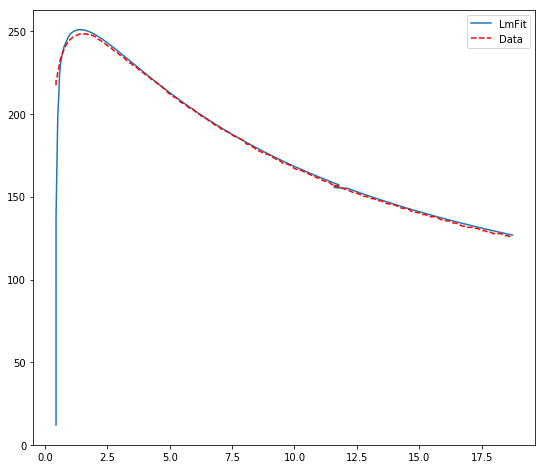

In [33]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
plt.plot(r_b_nord,lb_curve(r_b_nord,l_b),linestyle='-',label='LmFit')

plt.errorbar(r_b_nord,v_b_nord,fmt='r',label='Data',linestyle='--') #Plot points (fmt='*o') with error bars
#plt.plot(r_b_nord,ycurve,label='Function')                      #Accepting default style gives us a solid line
#plt.plot(r_b_nord,s_curve,linestyle='--',label='SciPy')         #Plot the scipy curve fit with a dashed line

plt.legend()           #Tells our plot to show a legend
plt.show()             #Depending how your environment is set up, this line may not be necessary, but it won't break anything.